# Task 5: Decision Trees & Random Forests — Heart Disease Dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 200)
plt.rcParams['figure.figsize'] = (10,6)

In [5]:
# Load the Heart Disease dataset
try:
    df = pd.read_csv("C:/Users/ADMIN/Downloads/Elevate Labs Tasks/heart.csv")
    print('Loaded heart.csv with shape', df.shape)
except Exception as e:
    print('Error loading heart.csv:', e)
df.head()


Loaded heart.csv with shape (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 1. Quick Exploration

In [6]:
print(df.info())
print('\nMissing values:\n', df.isnull().sum())
print('\nDescribe:')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target     

## 2. Preprocessing & Feature Preparation

In [8]:
# Determine target column
possible_targets = [c for c in df.columns if c.lower() in ['target','heartdisease','heart_disease','output','disease']]
if possible_targets:
    target = possible_targets[0]
else:
    target = df.columns[-1]
print('Using target column:', target)
X = df.drop(columns=[target])
y = df[target]
# Scale numeric
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_scaled = X.copy()
if num_cols:
    X_scaled[num_cols] = scaler.fit_transform(X[num_cols])
X_scaled.head()


Using target column: target


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


## 3. Train/Test Split & Baseline Decision Tree

Decision Tree Accuracy: 0.9883268482490273
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       125
           1       1.00      0.98      0.99       132

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



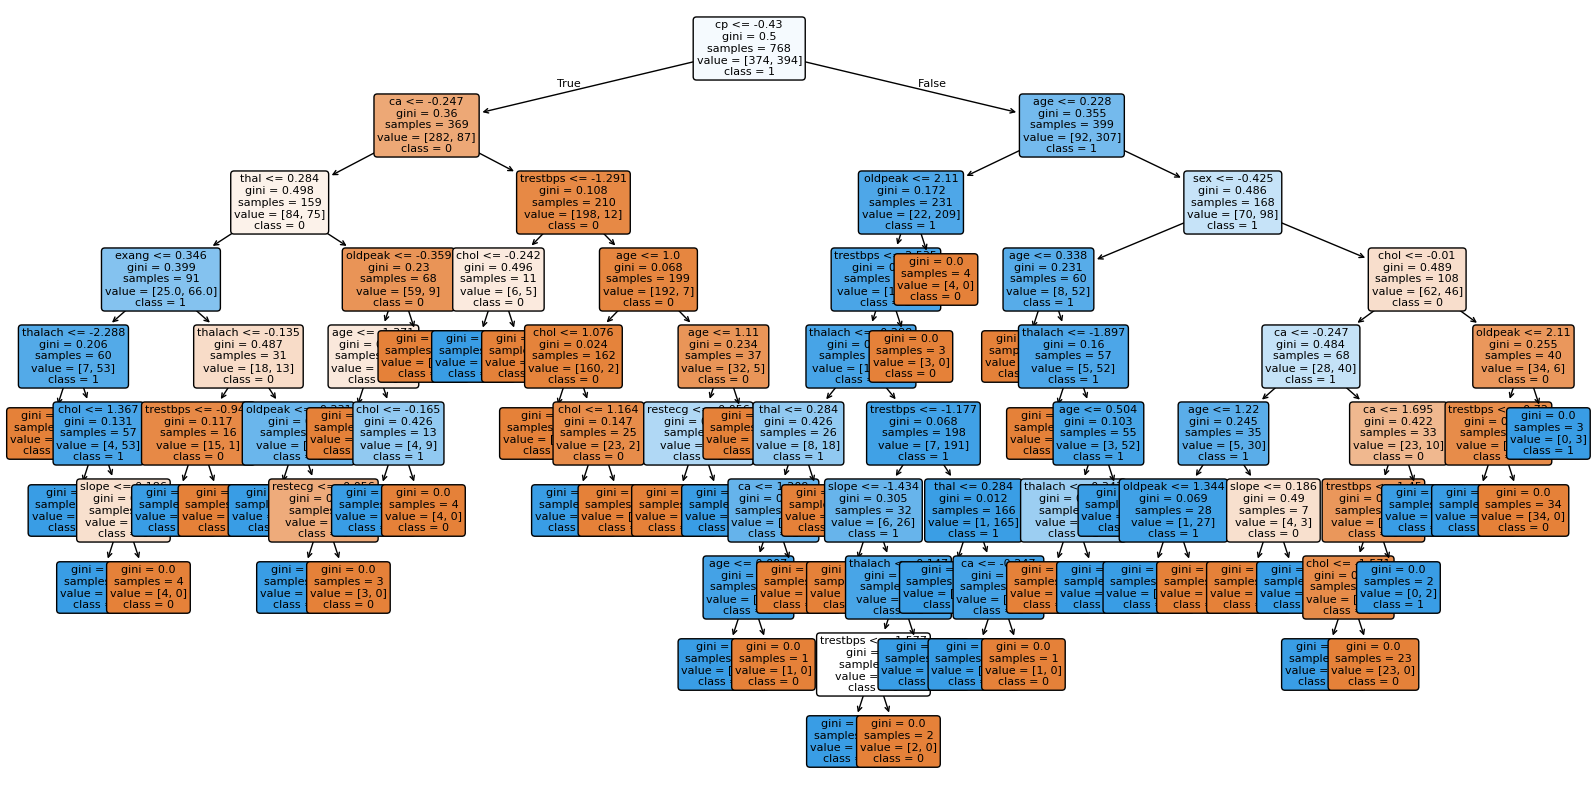

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True, rounded=True, fontsize=8)
plt.show()


## 4. Overfitting Analysis: Controlling Tree Depth

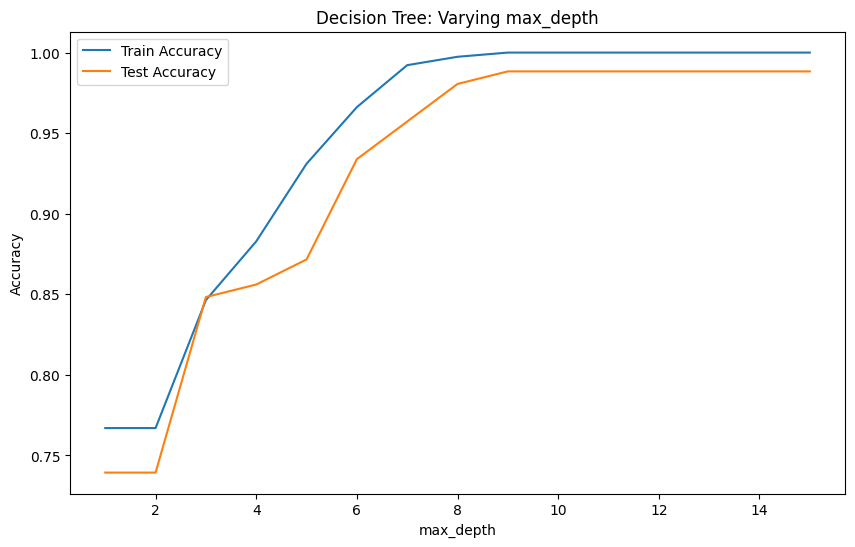

Best max_depth by test accuracy: 9 with acc 0.9883268482490273


In [ ]:
depths = list(range(1,16))
train_scores = []
test_scores = []
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(depths, train_scores, label='Train Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Varying max_depth')
plt.legend()
plt.show()
best_d = depths[int(np.argmax(test_scores))]
print('Best max_depth by test accuracy:', best_d, 'with acc', max(test_scores))


## 5. Hyperparameter Tuning (Decision Tree) using GridSearchCV

In [15]:
param_grid = {'max_depth':[3,5,7,9,None], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4]}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print('Best params:', grid.best_params_)
print('Best CV score:', grid.best_score_)

best_dt = grid.best_estimator_
y_pred = best_dt.predict(X_test)
print('Tuned Decision Tree Test Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.9765809354044649
Tuned Decision Tree Test Accuracy: 0.9883268482490273
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       125
           1       1.00      0.98      0.99       132

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



## 6. Random Forest: Train & Compare

In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print('Decision Tree (tuned) acc:', accuracy_score(y_test, best_dt.predict(X_test)))
print('Random Forest acc:', accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

Decision Tree (tuned) acc: 0.9883268482490273
Random Forest acc: 1.0


## 7. Feature Importances

cp          0.141306
thalach     0.124660
ca          0.111668
oldpeak     0.107031
thal        0.105304
age         0.089416
trestbps    0.080113
chol        0.078738
exang       0.060942
slope       0.039625
sex         0.031250
restecg     0.021278
fbs         0.008669
dtype: float64


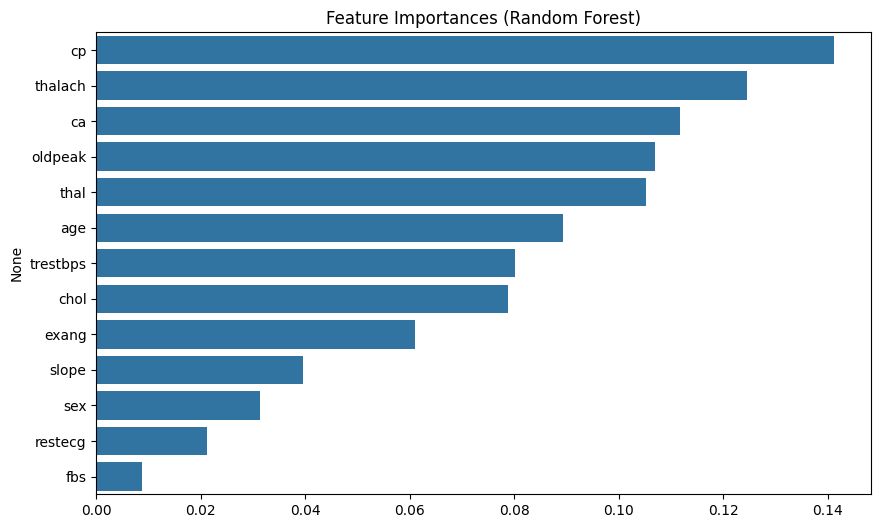

In [17]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importances (Random Forest)')
plt.show()

## 8. Cross-Validation Evaluation

In [18]:
dt_cv_scores = cross_val_score(best_dt, X_scaled, y, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')
print('Decision Tree CV scores:', dt_cv_scores)
print('Decision Tree CV mean:', dt_cv_scores.mean())
print('Random Forest CV scores:', rf_cv_scores)
print('Random Forest CV mean:', rf_cv_scores.mean())

Decision Tree CV scores: [1. 1. 1. 1. 1.]
Decision Tree CV mean: 1.0
Random Forest CV scores: [1.         1.         1.         1.         0.98536585]
Random Forest CV mean: 0.9970731707317073


In [22]:
# Save processed dataset
processed = X_scaled.copy()
processed[target] = y
processed.to_csv("C:/Users/ADMIN/Downloads/Elevate Labs Tasks/heart_processed.csv", index=False)
print('Saved processed dataset')


Saved processed dataset
